In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("C4_Dados.xlsx").drop(columns = ["Unnamed: 0","Unnamed: 1"]).dropna()

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6
1,87.0,15.0,7.0,8.0,8.0,196.0
2,97.0,19.0,7.0,24.0,10.0,231.0
3,138.0,26.0,9.0,16.0,11.0,221.0
4,99.0,21.0,10.0,8.0,10.0,193.0
5,146.0,5.0,13.0,5.0,6.0,242.0


In [4]:
data.describe()

,V1,V2,V3,V4,V5,V6
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,98.929847,3.748724,11.475765,7.588010,4.149235,168.258929
std,58.395240,3.704179,9.206829,12.164681,2.253290,109.671904
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,67.000000,2.000000,7.000000,4.000000,3.000000,31.000000
50%,85.500000,3.000000,10.000000,5.000000,4.000000,227.000000
75%,116.000000,4.000000,14.000000,7.000000,5.000000,254.000000
max,607.000000,31.000000,127.000000,189.000000,27.000000,400.000000


In [5]:
data = data["V6"]

In [6]:
# a) Tendência central
media, mediana, moda = data.mean(), data.median(), data.mode()[0]
print("Média: ", media)
print("Mediana: ", mediana)
print("Moda: ", moda)

Média:  168.25892857142858
Mediana:  227.0
Moda:  4.0


In [7]:
# b) Momento de primeira e central de segunda ordem
variancia = data.var(ddof = 0)
print("Primeira: ", media)
print("Segunda: ", variancia)

Primeira:  168.25892857142858
Segunda:  12012.584741709172


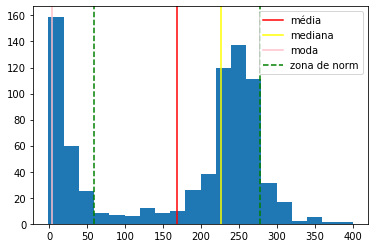

In [8]:
# c) e d) Plote a distribuição da variável, marcando os valores acima calculados e verificar visualmente a normalidade
plot = plt.hist(data, 20)
plot = plt.axvline(media, c = "red", label = "média")
plot = plt.axvline(mediana, c = "yellow", label = "mediana")
plot = plt.axvline(moda, c = "pink", label = "moda")
plot = plt.axvline(media + math.sqrt(variancia), c = "green", ls = "--", label = "zona de norm")
plot = plt.axvline(media - math.sqrt(variancia), c = "green", ls = "--")
plot = plt.legend()

In [9]:
# e) Verifique numericamente o grau de assimetria e curtose da variável
coefAssimPearson = (media - moda) / math.sqrt(variancia)
print("Coeficiente de Assimetria de Pearson: ", coefAssimPearson)
tipoAssimetria = "à esquerda" if coefAssimPearson < 0 else "à direita"
if abs(coefAssimPearson) < 0.15:
    print("Assimetria fraca " + tipoAssimetria)
else:
    print("Assimetria moderada " + tipoAssimetria) if coefAssimPearson < 1 else print("Assimetria forte " + tipoAssimetria)
q3, q1, p90, p10 = data.quantile(0.75), data.quantile(0.25), data.quantile(0.9), data.quantile(0.1)
coefCurt = (q3 - q1) / (2 * (p90 - p10))
print("Coeficiente de Curtose: ", coefCurt)
if coefCurt == 0.263:
    print("Curva mesocúrtica")
else:
    print("Curva platicúrtica") if coefCurt < 0.263 else print("Curva leptocúrtica")

Coeficiente de Assimetria de Pearson:  1.4986863559043404
Assimetria forte à direita
Coeficiente de Curtose:  0.4196462175385773
Curva leptocúrtica


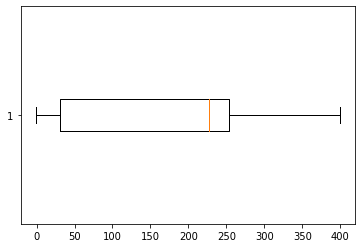

In [10]:
# f) Confirme a normalidade da variável através do Q-Q Plot
plot = plt.boxplot(data, vert = False)